In [11]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755731900234.jpg,0.292330,0.167730,0.924896,0.837736,0.921438
1,Dataset/1755898113758.jpg,0.110629,0.846858,0.848210,0.391767,0.866680
2,Dataset/1755898095065.jpg,0.613679,0.200659,0.932960,0.944959,0.809891
3,Dataset/1757521071045.jpg,0.880958,0.844953,0.932576,0.051789,0.794842
4,Dataset/1755898115819.jpg,0.592098,0.878526,0.623440,0.143231,0.735963
...,...,...,...,...,...,...
5021,Dataset/1755730568144.jpg,0.060359,0.482458,0.056418,0.485344,0.004885
5022,Dataset/1755881751203.jpg,0.952632,0.099518,0.952375,0.094731,0.004794
5023,Dataset/1755777800487.jpg,0.843252,0.775105,0.842503,0.770428,0.004736
5024,Dataset/1755730188156.jpg,0.051927,0.379323,0.054782,0.377455,0.003412


In [12]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

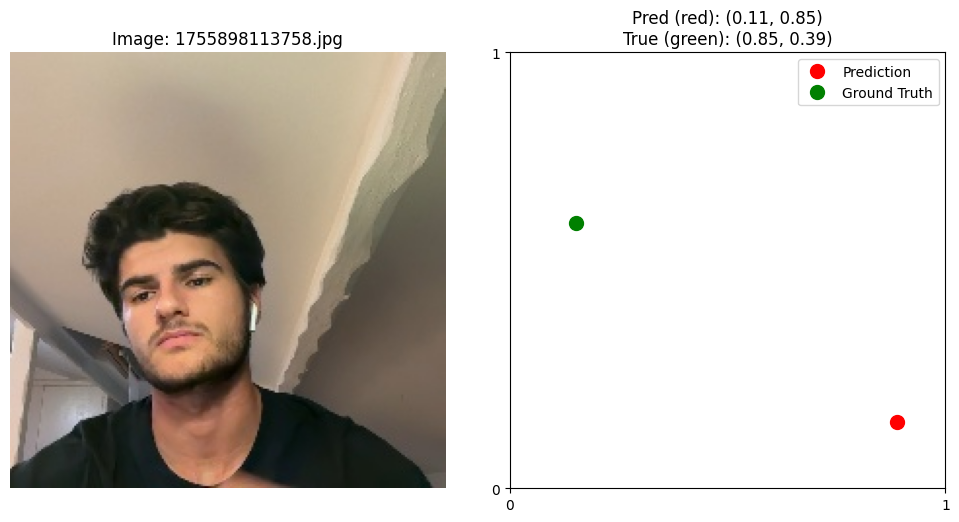

In [ ]:
images_to_delete = []

idx = 0
while True:
    display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(idx)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [ ]:
print('images_to_delete', images_to_delete)

images_to_delete []


In [ ]:
dataset_df = pd.read_csv('dataset.csv')

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

dataset_df.to_csv('dataset_fixed.csv', index=False)